## INTRODUCTION
This notebook aims to forecast the life expectancy of nations through the assessment of health, financial, and national factors. Life expectancy, also known as average lifespan, is a statistical measure that reveals the typical duration of life for individuals within a society or, in simpler terms, the projected lifespan.The research on life expectancy in countries takes the spotlight in the notebook's machine learning model. Substantial data analysis and predictive algorithms are used to uncover the reasons causing differences in longevity among countries. With the aid of strong statistical tools, valuable insights into the complex link between healthcare, socioeconomic factors, and life expectancy are sought. In the following, the features of this dataset are listed:

Country: Country under study

Year: year

Status: Status of the country's development

Population: Population of country

Hepatitis B: Percentage of people finally one year old who were immunized against hepatitis B

Measles: The number of reported measles cases per 1000 people

Polio: Percentage of 1-year-olds immunized against polio

Diphtheria: Percentage of people finally one year old who were immunized against diphtheria

HIV/AIDS: The number of deaths caused by AIDS of the last 4-year-olds who were born alive per 1000 people

infant deaths: The number of infant deaths per 1000 people

under-five deaths: The number of deaths of people under 5 years old per 1000 people

Total expenditure: The ratio of government medical-health expenses to total government expenses in percentage

GDP: Gross domestic product

BMI: The average body mass index of the entire population of the country

thinness 1-19 years: Prevalence of thinness among people 19 years old in percentage

Alcohol: Liters of alcohol consumption among people over 15 years old

Schooling: The number of years that people study

Life expectancy: Country life expectancy

In [35]:
#Importing the packages

import numpy as np #linear algebra
import pandas as pd #data processing, reading and modifyling datasets and dataframes
import matplotlib.pyplot as plt  #plotting the graphs
import seaborn as sns  #different charts
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')  # running this will list all files under the input directory
print("Libraries Imported")

Libraries Imported


In [2]:
# Import dataset
df=pd.read_csv('C:\\Users\\NIDHI RANJAN\\Downloads\\life_expectancy.csv')

In [3]:
df.head()

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0        65.0       0.1             62                 83               8.16   
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   

          GDP   BMI  thinness  1-19 years  Alcohol  Schooling  Life expectancy  
0  584.259210  19.1                  17.2     0.01       10.1             65.0  
1  612.696514  18.6                  17.5     0.01       10.0             59.9  
2  631.744976  18.1                  17.7     0.01        9.9             59.9  
3  669.959000  17.6                  17.9     0.01        9.8             59.5  
4   63.537231  17.2                  18.2     0.01        9.5             59.2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [5]:
df.describe()

Year    Population  Hepatitis B        Measles        Polio  \
count  2848.000000  2.204000e+03  2306.000000    2848.000000  2829.000000   
mean   2007.500000  1.283457e+07    81.076756    2083.082163    82.682220   
std       4.610582  6.196094e+07    25.019068   10249.107207    23.434954   
min    2000.000000  3.400000e+01     1.000000       0.000000     3.000000   
25%    2003.750000  1.967585e+05    77.000000       0.000000    78.000000   
50%    2007.500000  1.391756e+06    92.000000      16.000000    93.000000   
75%    2011.250000  7.438947e+06    97.000000     336.750000    97.000000   
max    2015.000000  1.293859e+09    99.000000  212183.000000    99.000000   

        Diphtheria     HIV/AIDS  infant deaths  under-five deaths  \
count  2829.000000  2848.000000    2848.000000        2848.000000   
mean     82.451396     1.756461      28.359902          39.500000   
std      23.693936     5.148935     117.188032         159.800866   
min       2.000000     0.100000       0.000000           0.000000   
25%      78.000000     0.100000       0.000000           0.000000   
50%      93.000000     0.100000       3.000000           4.000000   
75%      97.000000     0.700000      20.000000          25.000000   
max      99.000000    50.600000    1800.000000        2500.000000   

       Total expenditure            GDP          BMI  thinness  1-19 years  \
count        2627.000000    2406.000000  2816.000000           2816.000000   
mean            5.935577    7664.398813    38.503374              4.847230   
std             2.504439   14466.241793    19.955485              4.443695   
min             0.370000       1.681350     1.000000              0.100000   
25%             4.240000     477.541713    19.500000              1.600000   
50%             5.760000    1841.086830    43.900000              3.300000   
75%             7.530000    6265.658907    56.200000              7.125000   
max            17.600000  119172.741800    77.600000             27.700000   

           Alcohol    Schooling  Life expectancy  
count  2660.000000  2688.000000      2848.000000  
mean      4.638932    12.060156        69.347402  
std       4.064721     3.320160         9.528332  
min       0.010000     0.000000        36.300000  
25%       0.930000    10.200000        63.500000  
50%       3.785000    12.400000        72.200000  
75%       7.810000    14.300000        75.800000  
max      17.870000    20.700000        89.000000

In [6]:
df.shape

(2848, 18)

## Our numerical variables are:
Population, Hepatitis B, Measles,Polio,Diphtheria,HIV/AIDS,Infant deaths,Under-five deaths,Total expenditure,GDP,BMI,Thinness 1-19 years,Alcohol,Schooling,Life expectancy

## Our categorical variables are:
Country, Year, Status

In [ ]:
#Numerical Variables: We'll use histograms and boxplots.
#Categorical Variables: We'll use bar plots.

## Visualization of  variables

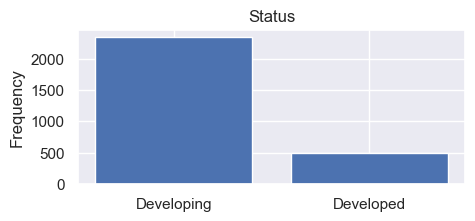

Status: 
 Status
Developing    2352
Developed      496
Name: count, dtype: int64


In [7]:
def bar_plot(variable):
    "input - variable,example - Gender"
    "Output - Bar Plot "
    
    var=df[variable]
    varValue=var.value_counts()
    
    #visualize
    plt.figure(figsize=(5,2))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
category1=["Status"]
for c in category1:
    bar_plot(c)

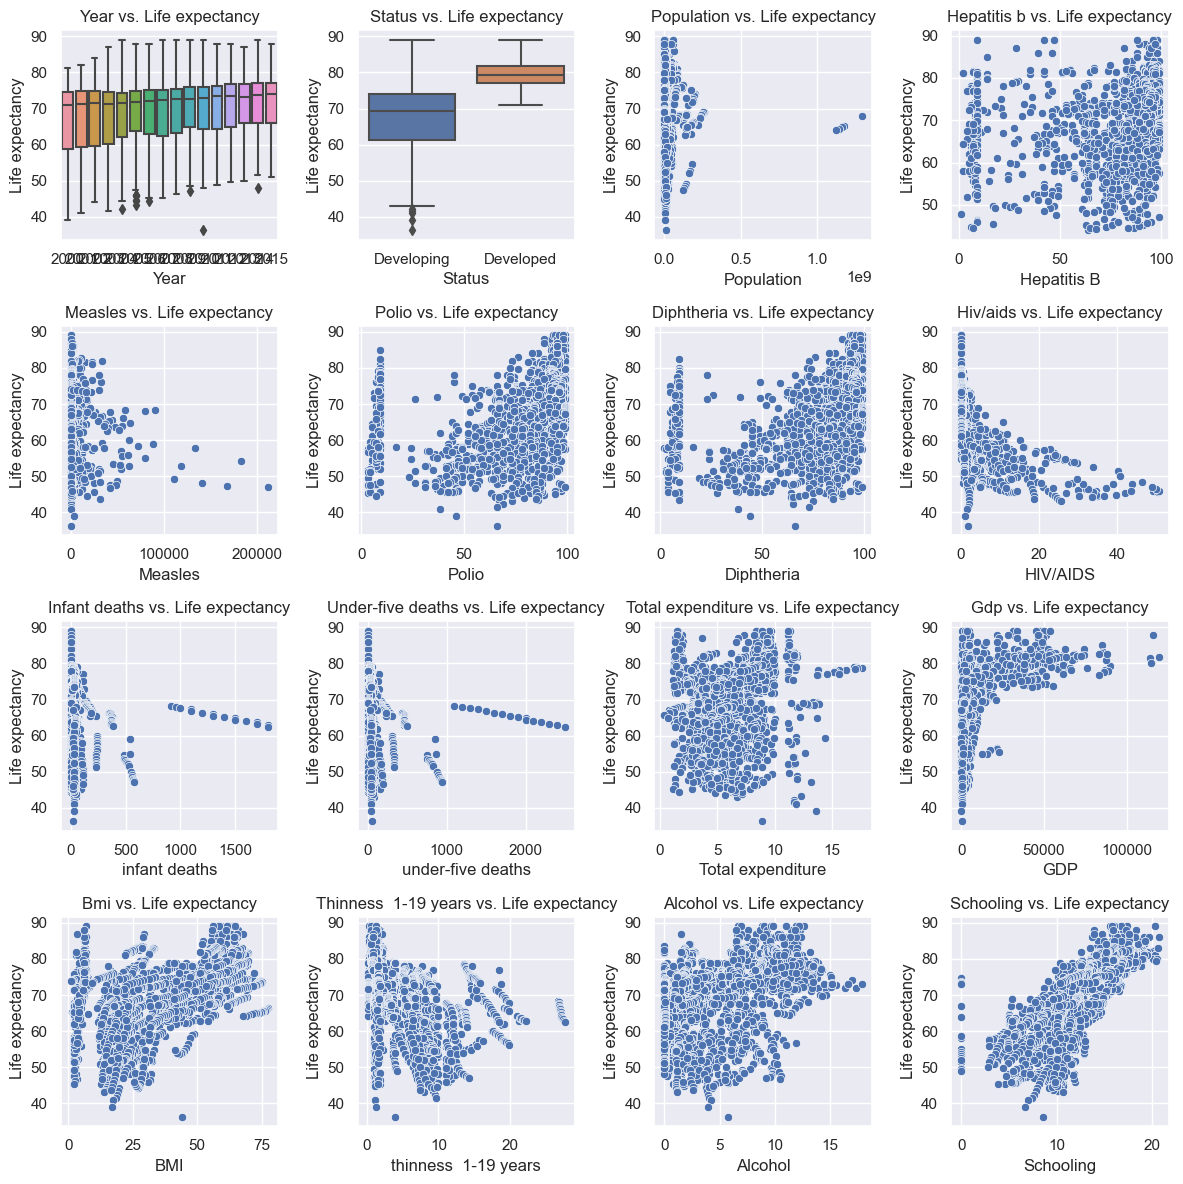

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

class RelationshipPlotter:
    def __init__(self, data):
        self.data = data
        self.fig, self.axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))  # Create a 4x4 subplot grid
    
    def plot(self, row, col, x, y, plot_type):
        ax = self.axes[row, col]  # Select the appropriate subplot
        if plot_type == 'scatter':
            sns.scatterplot(data=self.data, x=x, y=y, ax=ax)
        elif plot_type == 'box':
            sns.boxplot(data=self.data, x=x, y=y, ax=ax)
        ax.set_title(f"{x.capitalize()} vs. {y.capitalize()}")

    def show_plots(self):
        plt.tight_layout()  # Adjust spacing between subplots
        plt.show()

# Assuming df is your DataFrame
columns_of_box = ['Year', 'Status']       
columns_of_scat = ['Population', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths',
                   'under-five deaths', 'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol', 'Schooling']         
        
plotter = RelationshipPlotter(data=df)

# Plot the relationships
for i, col in enumerate(columns_of_box):
    plotter.plot(i // 4, i % 4, x=col, y='Life expectancy', plot_type='box')
    
for i, col in enumerate(columns_of_scat):
    plotter.plot((i + len(columns_of_box)) // 4, (i + len(columns_of_box)) % 4, x=col, y='Life expectancy', plot_type='scatter')

plotter.show_plots()


In [9]:
#Box Plot by Category: Creates a box plot for each category of a categorical variable, allowing you to compare the distribution of a numerical variable across different categories.
#Scatter Plot: This is the most common visualization for two numerical variables. It shows the relationship between the variables, allowing you to identify trends or correlations.

## Numerical Variables Distribution

In [ ]:
#This code provides a basic analysis of the numerical variables distribution, including:

#Summary statistics (mean, median, mode, standard deviation, etc.) for each numerical column.
#Histograms and density plots to visualize the distribution of life expectancy.
#Boxplots to check for outliers in life expectancy.
#Correlation analysis to identify relationships between life expectancy and other numerical columns.
#A heatmap to visualize the correlation matrix.

In [11]:
numericVar=['Life expectancy','Population', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths','under-five deaths', 'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol', 'Schooling']         
numericVar

['Life expectancy',
 'Population',
 'Hepatitis B',
 'Measles',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'infant deaths',
 'under-five deaths',
 'Total expenditure',
 'GDP',
 'BMI',
 'thinness  1-19 years',
 'Alcohol',
 'Schooling']

In [12]:
summary_stats = df[numericVar].describe()
print(summary_stats)

       Life expectancy    Population  Hepatitis B        Measles        Polio  \
count      2848.000000  2.204000e+03  2306.000000    2848.000000  2829.000000   
mean         69.347402  1.283457e+07    81.076756    2083.082163    82.682220   
std           9.528332  6.196094e+07    25.019068   10249.107207    23.434954   
min          36.300000  3.400000e+01     1.000000       0.000000     3.000000   
25%          63.500000  1.967585e+05    77.000000       0.000000    78.000000   
50%          72.200000  1.391756e+06    92.000000      16.000000    93.000000   
75%          75.800000  7.438947e+06    97.000000     336.750000    97.000000   
max          89.000000  1.293859e+09    99.000000  212183.000000    99.000000   

        Diphtheria     HIV/AIDS  infant deaths  under-five deaths  \
count  2829.000000  2848.000000    2848.000000        2848.000000   
mean     82.451396     1.756461      28.359902          39.500000   
std      23.693936     5.148935     117.188032         159.8008

In [13]:
def plot_hist(variable3):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable3],bins=50)
    plt.xlabel(variable3)
    plt.ylabel("Count")
    plt.title("{} distribution with histogram plot.".format(variable3))
    plt.show()

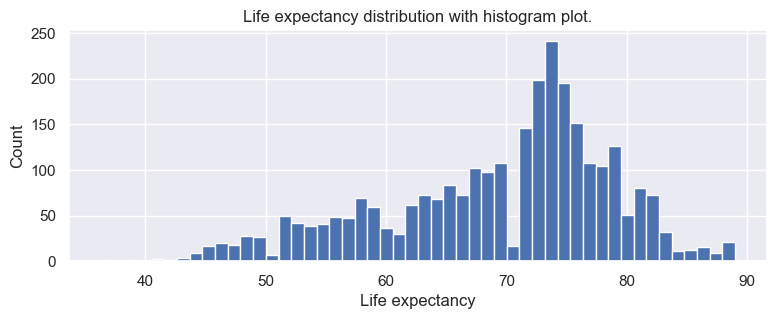

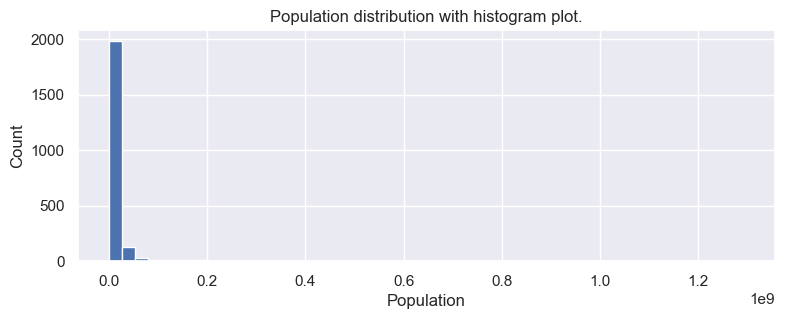

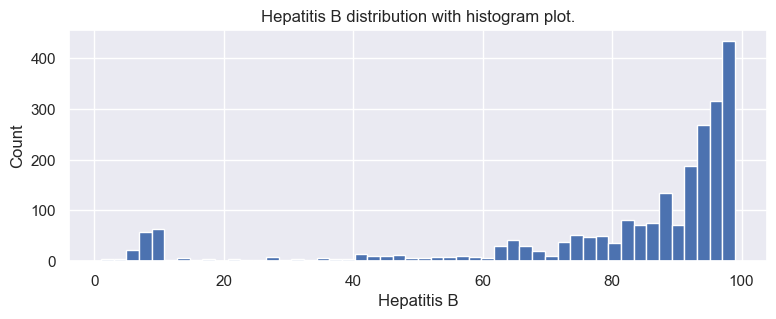

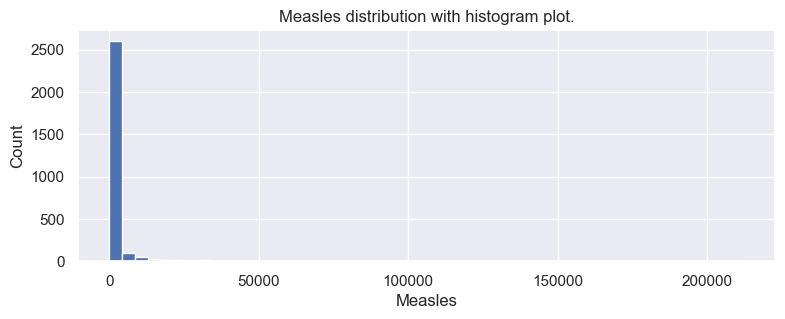

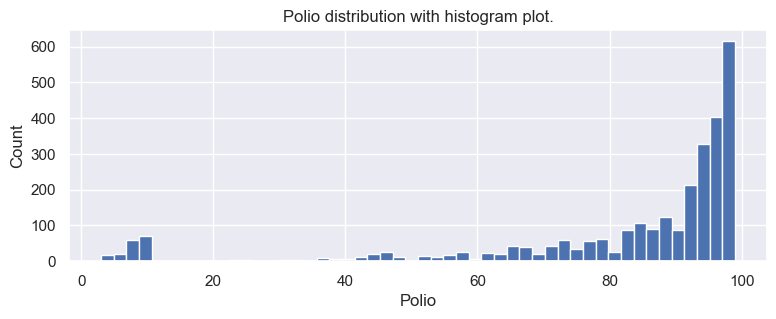

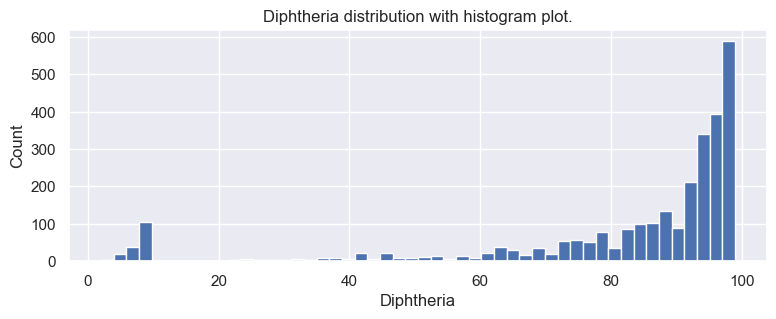

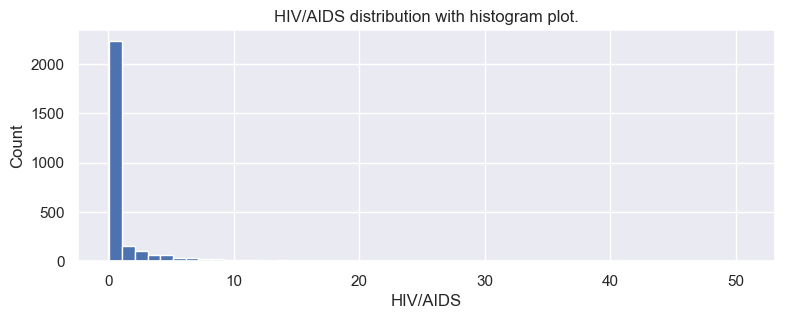

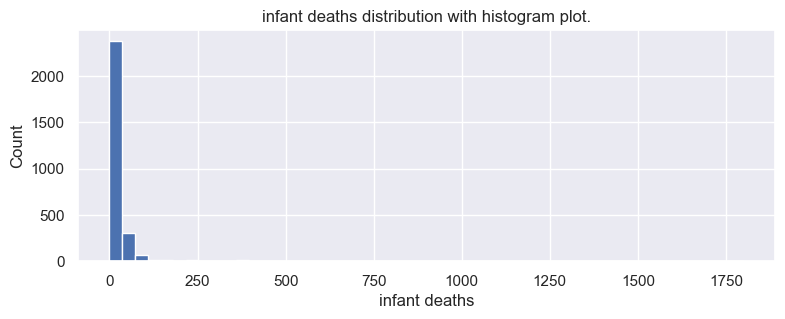

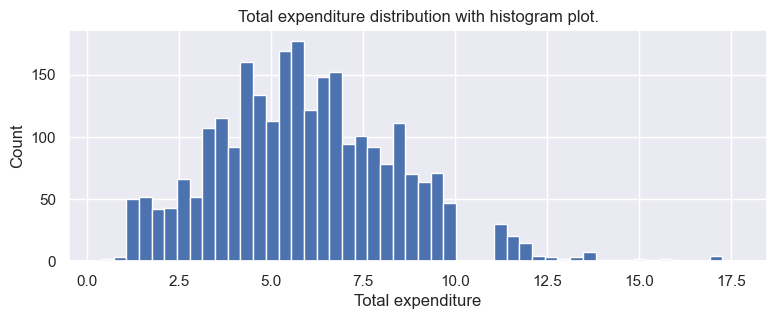

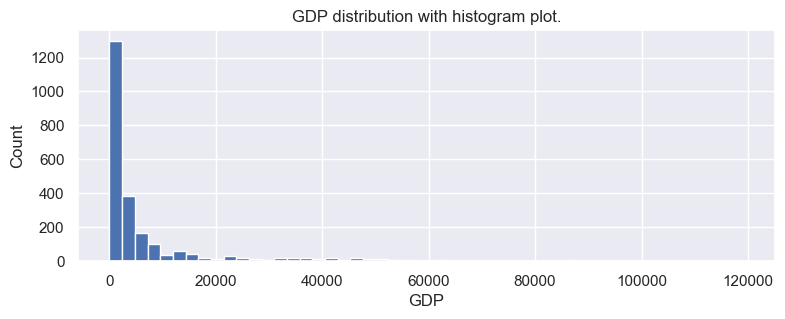

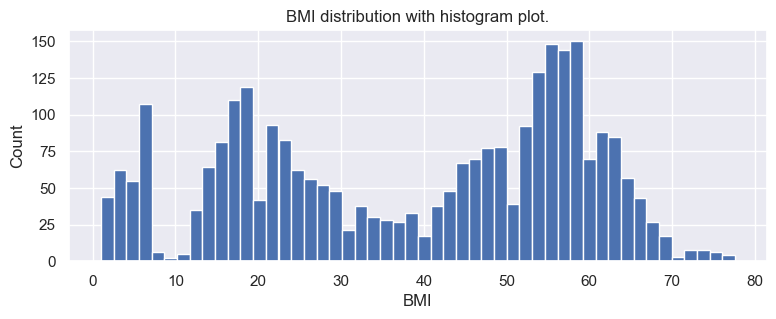

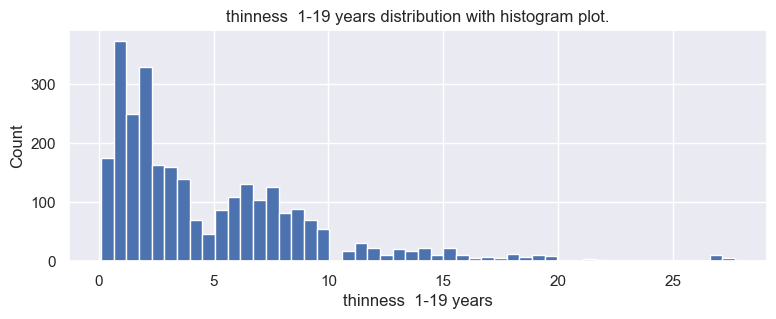

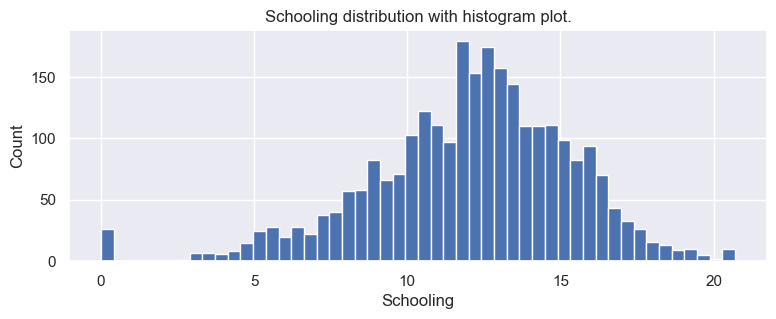

In [14]:
for n in numericVar:
    plot_hist(n)

In [15]:
# Check for outliers in life expectancy using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df['Life expectancy'])
plt.title('Boxplot of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Value')
plt.show()

In [16]:
# Calculate correlations between life expectancy and other numerical columns
correlations = df[numericVar].corr()
print(correlations)


                      Life expectancy  Population  Hepatitis B   Measles  \
Life expectancy              1.000000   -0.019353     0.256613 -0.198178   
Population                  -0.019353    1.000000    -0.124750  0.323543   
Hepatitis B                  0.256613   -0.124750     1.000000 -0.147957   
Measles                     -0.198178    0.323543    -0.147957  1.000000   
Polio                        0.464366   -0.032998     0.484224 -0.169115   
Diphtheria                   0.476795   -0.024220     0.610164 -0.174630   
HIV/AIDS                    -0.559105   -0.029245    -0.115024  0.045853   
infant deaths               -0.201055    0.568906    -0.224604  0.493982   
under-five deaths           -0.224903    0.553922    -0.233360  0.512826   
Total expenditure            0.222788   -0.078426     0.069698 -0.104606   
GDP                          0.460414   -0.028052     0.082088 -0.073078   
BMI                          0.567650   -0.070635     0.155585 -0.174793   
thinness  1-

In [17]:
# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True,cmap='coolwarm', square=True )
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [18]:
sns.pairplot(df)

## Removing outliers
To determine if outlier removal is necessary. We'll focus on the life_expectancy column, as it's the target variable. Using the histogram and density plot from the previous code, we can visually inspect the distribution of life_expectancy. The plots suggest that the data is relatively normally distributed, with no obvious outliers. We can use statistical methods to detect outliers. One common method is the Z-score method, which calculates the number of standard deviations from the mean. Data points with a Z-score greater than 3 or less than -3 are typically considered outliers.Based on the visual inspection and statistical analysis, it appears that outlier removal is not necessary for the life_expectancy column.When checked for other numerical variables, the result is same. hence, no outliers in the data.

In [19]:
from scipy import stats

z_scores = stats.zscore(df['Life expectancy'])
print(z_scores)

0      -0.456341
1      -0.991680
2      -0.991680
3      -1.033668
4      -1.065158
          ...   
2843   -2.629190
2844   -2.608197
2845   -2.576706
2846   -2.524222
2847   -2.450744
Name: Life expectancy, Length: 2848, dtype: float64


In [20]:
numericVar=['Population', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths','under-five deaths', 'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol', 'Schooling']           # add other numerical columns
def remove_outliers(df, column, z_threshold=3):
    z_scores = stats.zscore(df[column])
    outliers = np.abs(z_scores) > z_threshold
    df_clean = df[~outliers]
    return df_clean
for col in numericVar:
    df_clean = remove_outliers(df, col)

In [21]:
print(df_clean)

          Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0     Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1     Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2     Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3     Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4     Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   
...           ...   ...         ...         ...          ...      ...    ...   
2843     Zimbabwe  2004  Developing  12777511.0         68.0       31   67.0   
2844     Zimbabwe  2003  Developing  12633897.0          7.0      998    7.0   
2845     Zimbabwe  2002  Developing    125525.0         73.0      304   73.0   
2846     Zimbabwe  2001  Developing  12366165.0         76.0      529   76.0   
2847     Zimbabwe  2000  Developing  12222251.0         79.0     1483   78.0   

      Diphtheria  HIV/AIDS  infant deat

In [22]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

In [23]:
df1=df

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2848 non-null   float64
 4   Hepatitis B           2848 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2848 non-null   float64
 7   Diphtheria            2848 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2848 non-null   float64
 12  GDP                   2848 non-null   float64
 13  BMI                   2848 non-null   float64
 14  thinness  1-19 years  2848 non-null   float64
 15  Alcohol              

## Feature Engineering
We have to convert categorical features into numerical features. Why? Machine learning can be done with numbers, only numbers. So basically if you can turn a data into numbers, you can apply Machine Learning on it. Otherwise, you can't. This is why. How? There are several ways of doing this. Get dummies, label encoder, or list comprehension. I am going to use dummies on this notebook.

In [26]:
def drop_col(df1):
    return df.drop(labels=['Country', 'Year'], axis=1)

df1 = drop_col(df1)

In this specific case, the Country and Year columns are likely being dropped because they are not relevant to the machine learning model being trained. Here's why:

Country: The country information is likely already captured in other columns, such as Hepatitis B or Polio rates, which are more relevant to the problem. Keeping the Country column might lead to overfitting or biased models. Year: The year information might not be relevant to the problem, especially if the dataset is already normalized or standardized. Keeping the Year column might introduce unnecessary noise or trends in the data.

In [27]:
df1

Status  Population  Hepatitis B  Measles  Polio  Diphtheria  \
0     Developing  33736494.0         65.0     1154    6.0        65.0   
1     Developing    327582.0         62.0      492   58.0        62.0   
2     Developing  31731688.0         64.0      430   62.0        64.0   
3     Developing   3696958.0         67.0     2787   67.0        67.0   
4     Developing   2978599.0         68.0     3013   68.0        68.0   
...          ...         ...          ...      ...    ...         ...   
2843  Developing  12777511.0         68.0       31   67.0        65.0   
2844  Developing  12633897.0          7.0      998    7.0        68.0   
2845  Developing    125525.0         73.0      304   73.0        71.0   
2846  Developing  12366165.0         76.0      529   76.0        75.0   
2847  Developing  12222251.0         79.0     1483   78.0        78.0   

      HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0          0.1             62                 83               8.16   
1          0.1             64                 86               8.18   
2          0.1             66                 89               8.13   
3          0.1             69                 93               8.52   
4          0.1             71                 97               7.87   
...        ...            ...                ...                ...   
2843      33.6             27                 42               7.13   
2844      36.7             26                 41               6.52   
2845      39.8             25                 40               6.53   
2846      42.1             25                 39               6.16   
2847      43.5             24                 39               7.10   

             GDP   BMI  thinness  1-19 years  Alcohol  Schooling  \
0     584.259210  19.1                  17.2     0.01       10.1   
1     612.696514  18.6                  17.5     0.01       10.0   
2     631.744976  18.1                  17.7     0.01        9.9   
3     669.959000  17.6                  17.9     0.01        9.8   
4      63.537231  17.2                  18.2     0.01        9.5   
...          ...   ...                   ...      ...        ...   
2843  454.366654  27.1                   9.4     4.36        9.2   
2844  453.351155  26.7                   9.8     4.06        9.5   
2845   57.348340  26.3                   1.2     4.43       10.0   
2846  548.587312  25.9                   1.6     1.72        9.8   
2847  547.358878  25.5                  11.0     1.68        9.8   

      Life expectancy  
0                65.0  
1                59.9  
2                59.9  
3                59.5  
4                59.2  
...               ...  
2843             44.3  
2844             44.5  
2845             44.8  
2846             45.3  
2847             46.0  

[2848 rows x 16 columns]

In [28]:
def preprocess_data(data):
    # Create dummy variables for 'Status' column
    dummies = pd.get_dummies(data['Status'], dtype=int)
    data = pd.concat([data, dummies], axis=1)

    # Drop 'Status' column
    data = data.drop(labels='Status', axis=1)
    
    return data

# Preprocess the data
df1 = preprocess_data(df1)

#DEVELOPED-0
#DEVELOPING-1

In [29]:
df1

Population  Hepatitis B  Measles  Polio  Diphtheria  HIV/AIDS  \
0     33736494.0         65.0     1154    6.0        65.0       0.1   
1       327582.0         62.0      492   58.0        62.0       0.1   
2     31731688.0         64.0      430   62.0        64.0       0.1   
3      3696958.0         67.0     2787   67.0        67.0       0.1   
4      2978599.0         68.0     3013   68.0        68.0       0.1   
...          ...          ...      ...    ...         ...       ...   
2843  12777511.0         68.0       31   67.0        65.0      33.6   
2844  12633897.0          7.0      998    7.0        68.0      36.7   
2845    125525.0         73.0      304   73.0        71.0      39.8   
2846  12366165.0         76.0      529   76.0        75.0      42.1   
2847  12222251.0         79.0     1483   78.0        78.0      43.5   

      infant deaths  under-five deaths  Total expenditure         GDP   BMI  \
0                62                 83               8.16  584.259210  19.1   
1                64                 86               8.18  612.696514  18.6   
2                66                 89               8.13  631.744976  18.1   
3                69                 93               8.52  669.959000  17.6   
4                71                 97               7.87   63.537231  17.2   
...             ...                ...                ...         ...   ...   
2843             27                 42               7.13  454.366654  27.1   
2844             26                 41               6.52  453.351155  26.7   
2845             25                 40               6.53   57.348340  26.3   
2846             25                 39               6.16  548.587312  25.9   
2847             24                 39               7.10  547.358878  25.5   

      thinness  1-19 years  Alcohol  Schooling  Life expectancy  Developed  \
0                     17.2     0.01       10.1             65.0          0   
1                     17.5     0.01       10.0             59.9          0   
2                     17.7     0.01        9.9             59.9          0   
3                     17.9     0.01        9.8             59.5          0   
4                     18.2     0.01        9.5             59.2          0   
...                    ...      ...        ...              ...        ...   
2843                   9.4     4.36        9.2             44.3          0   
2844                   9.8     4.06        9.5             44.5          0   
2845                   1.2     4.43       10.0             44.8          0   
2846                   1.6     1.72        9.8             45.3          0   
2847                  11.0     1.68        9.8             46.0          0   

      Developing  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
2843           1  
2844           1  
2845           1  
2846           1  
2847           1  

[2848 rows x 17 columns]

## Splitting the data

In [30]:
train_data = pd.DataFrame(df1)

# Splitting Data into Training and Validation Sets 
Y= train_data['Life expectancy']
X= train_data.drop(columns=['Life expectancy'])
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, shuffle=True)


In [31]:
print(X_train)
print(X_val)

      Population  Hepatitis B  Measles  Polio  Diphtheria  HIV/AIDS  \
117     223175.0    92.000000       70   92.0        92.0       0.1   
1736    279915.0    86.333333       21   81.0        86.0      15.2   
864    5479531.0    89.000000        2   97.0        97.0       0.1   
1821     12262.0    60.571429    31584   43.0        39.0       1.6   
129    8541575.0    98.000000      117   98.0        98.0       0.1   
...          ...          ...      ...    ...         ...       ...   
2462  16766899.0     8.000000      290   83.0        82.0       0.1   
187    1396804.5    98.000000       11   98.0        98.0       0.1   
2015   1396804.5    93.000000    32647   99.0        97.0       0.1   
1018    139628.0    87.000000        0   87.0        87.0       0.4   
1615   1186873.0    88.000000        0   88.0        88.0       0.1   

      infant deaths  under-five deaths  Total expenditure           GDP   BMI  \
117               1                  1              9.200  51874.8

In [32]:
print(y_train)
print(y_val)

117     81.9
1736    60.0
864     81.1
1821    51.4
129     81.4
        ... 
2462    72.7
187     75.2
2015    76.0
1018    69.2
1615    71.0
Name: Life expectancy, Length: 2278, dtype: float64
313     66.2
53      49.6
2444    85.0
1195    67.2
2285    66.5
        ... 
1639    68.4
2256    88.0
239     68.0
716     77.3
1864    74.9
Name: Life expectancy, Length: 570, dtype: float64


In [33]:
# Scalling the dataset using StandardScaler
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)

Scaling the dataset is an important step in machine learning, especially when working with datasets that have different units or scales. Scaling helps to:

Prevent feature dominance: When features have different scales, some features may dominate others in the model, leading to poor performance. Scaling ensures that all features are on the same scale. Enhance interpretability: Scaling can make it easier to interpret the results of the model, as all features are on the same scale.

The fit_transform method is used on the X_train dataset to estimate the mean and standard deviation of each feature and apply the scaling transformation. The transform method is used on the X_val dataset to apply the same scaling transformation learned from the X_train dataset. The StandardScaler scales the data to have a mean of 0 and a standard deviation of 1 for each feature.

## Using GridSearch to find optimal hyperparameters ¶
GridSearchCV is a technique used in machine learning for hyperparameter tuning, which is the process of finding the best combination of hyperparameters for a given model. Hyperparameters are adjustable parameters that are not learned from the data but are set prior to the model training. GridSearchCV systematically searches through a specified grid of hyperparameter values and evaluates the model's performance using cross-validation to determine the optimal set of hyperparameters.

In [36]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
]

# Train and evaluate each model
for model in models:
    model.fit(scaled_x_train, y_train)
    y_pred = model.predict(scaled_x_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"Model: {type(model).__name__}, r2: {r2}")

Model: LinearRegression, r2: 0.7450319596333763
Model: DecisionTreeRegressor, r2: 0.9075334761211065
Model: RandomForestRegressor, r2: 0.9479440203186569
Model: ExtraTreesRegressor, r2: 0.9504082314776927


In [37]:
# Comparison of Predicted vs True Values and Residual Plot
class ModelComparisonPlot:
    def __init__(self, model_name):
        self.model_name = model_name
    
    def plot_comparison(self, y_val, y_pred, mse, mae, r2):
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(11, 5))

        # Plot the predicted vs true values
        sns.regplot(x=y_val, y=y_pred, color='blue', scatter_kws={'alpha':0.5}, ax=axes[0])
        axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
        axes[0].set_xlabel('True values', fontsize=12)
        axes[0].set_ylabel('Predicted values', fontsize=12)
        axes[0].set_title('Predicted vs true values')
        axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)
        
        # Plot the residuals vs predicted values
        residuals = y_val - y_pred
        sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5}, ax=axes[1])
        axes[1].plot([y_val.min(), y_val.max()], [0, 0], 'k--', lw=2)
        axes[1].set_xlabel('Predicted values', fontsize=12)
        axes[1].set_ylabel('Residuals', fontsize=12)
        axes[1].set_title('Residual plot', fontsize=15)
        axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

        # Add a title to the figure
        fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(self.model_name), fontsize=15)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.4)
        
        # Display the figure with the title
        plt.show()

## LINEAR REGRESSION

In [38]:
# Polynomial Regression Model Evaluation
poly_transformer = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly_transformer.fit_transform(scaled_x_train)
x_val_trans = poly_transformer.transform(scaled_x_val)
model_LR = LinearRegression()
model_LR.fit(x_train_trans, y_train)
y_pred = model_LR.predict(x_val_trans)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Model: {type(model_LR).__name__}, mse: {mse}")
print(f"Model: {type(model_LR).__name__}, mae: {mae}")
print(f"Model: {type(model_LR).__name__}, r2: {r2}")

Model: LinearRegression, mse: 32.29277630440539
Model: LinearRegression, mae: 3.0051571641888537
Model: LinearRegression, r2: 0.6275315971476025


In [39]:
# Create instances of ModelComparisonPlot for each model
model_LR_plot = ModelComparisonPlot('LinearRegression')
# Plot comparison for each model
model_LR_plot.plot_comparison(y_val, y_pred, mse, mae, r2)

## DECISION TREE

In [40]:
model_DTR = DecisionTreeRegressor( max_depth = None,  max_features = None,  min_samples_leaf = 2,  min_samples_split = 10)
model_DTR.fit(scaled_x_train, y_train)
y_pred = model_DTR.predict(scaled_x_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Model: {type(model_DTR).__name__}, mse: {mse}")
print(f"Model: {type(model_DTR).__name__}, mae: {mae}")
print(f"Model: {type(model_DTR).__name__}, r2: {r2}")

Model: DecisionTreeRegressor, mse: 7.398260780229895
Model: DecisionTreeRegressor, mae: 1.8276587301587306
Model: DecisionTreeRegressor, r2: 0.9146676535110474


In [41]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Decision Tree Regressor model
model = DecisionTreeRegressor()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(scaled_x_train, y_train)

# Print the best parameters and best R2 score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R2 Score: 0.8701455663606266


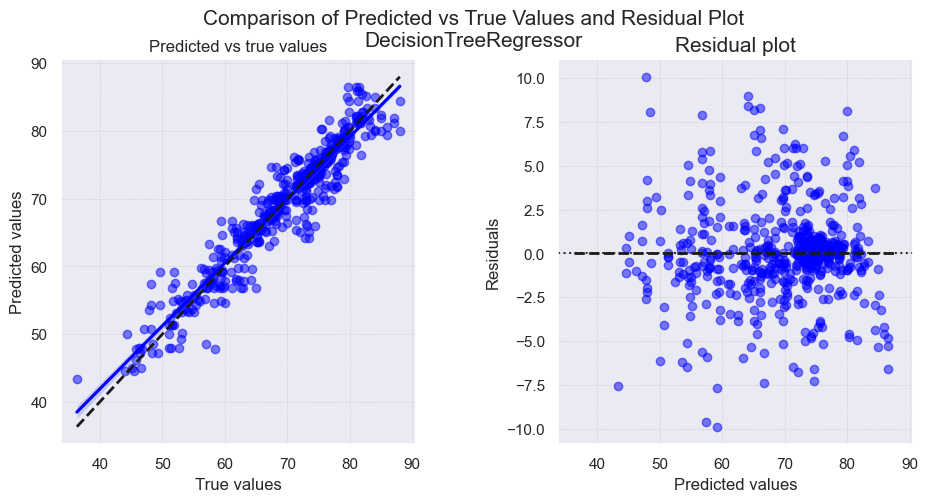

In [42]:
# Create instances of ModelComparisonPlot for each model
model_DTR_plot = ModelComparisonPlot('DecisionTreeRegressor')
# Plot comparison for each model
model_DTR_plot.plot_comparison(y_val, y_pred, mse, mae, r2)

## RANDOM FOREST REGRESSOR

In [43]:
model_RFR = RandomForestRegressor(max_depth= 10, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
model_RFR.fit(scaled_x_train, y_train)
y_pred = model_RFR.predict(scaled_x_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Model: {type(model_RFR).__name__}, mse: {mse}")
print(f"Model: {type(model_RFR).__name__}, mae: {mae}")
print(f"Model: {type(model_RFR).__name__}, r2: {r2}")

Model: RandomForestRegressor, mse: 5.057344181399063
Model: RandomForestRegressor, mae: 1.530189932345525
Model: RandomForestRegressor, r2: 0.9416680407976071


In [48]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(scaled_x_train, y_train)

# Print the best parameters and best R2 score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 Score: 0.9356718755715321


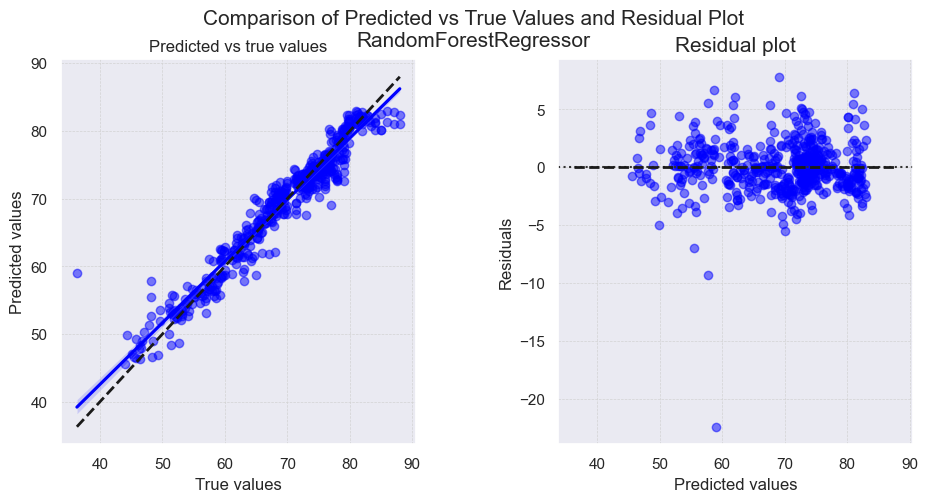

In [49]:
# Create instances of ModelComparisonPlot for each model
model_RFR_plot = ModelComparisonPlot('RandomForestRegressor')
# Plot comparison for each model
model_RFR_plot.plot_comparison(y_val, y_pred, mse, mae, r2)

## Feature Importance

[0.00610834 0.01601492 0.00450225 0.06678562 0.07523484 0.23302591
 0.01934999 0.02696959 0.01684275 0.02066192 0.18209449 0.05228352
 0.02059012 0.15335029 0.07886904 0.0273164 ]


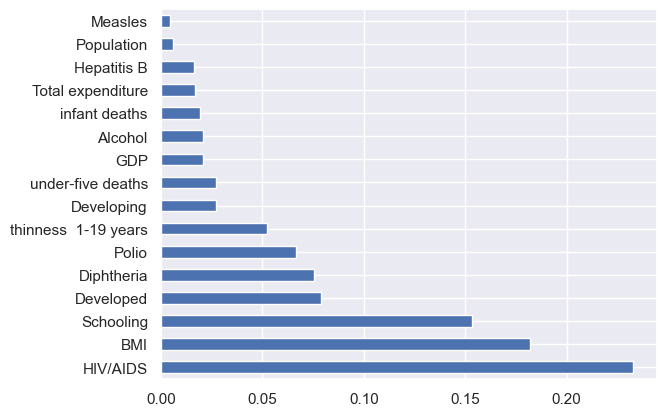

In [57]:
#Fit the model with your data
model_ETR.fit(X_train,y_train)

#Print feature importance
print(model_ETR.feature_importances_)

#Create a Pandas Series with feature importance, using feature names as index
feat_importances=pd.Series(model_ETR.feature_importances_,index=X.columns)

#Select the top 35 most important feature and plot them in a horizontal bar pi
feat_importances.nlargest(35).plot(kind='barh')

#Set the figure size
plt.rcParams["figure.figsize"]=(60,60)

#Show the plot
plt.show()